<a href="https://colab.research.google.com/github/pierobadano/Desafio-TelecomX-P1/blob/main/Desafio_Telecom_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Telecom X

En el siguiente notebook iré realizando mi codigo resolviendo el "Desafio Telecom X", aplicando todos los conocimientos aprendidos durante mi formacion como analista de datos hasta el momento

# Contexto

He sido contratado como asistente de análisis de datos en Telecom X y formare parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Mi desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

```
Diccionario de datos
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente

```




# Desarrollo

In [251]:
import pandas as pd
import numpy as np


In [252]:
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos_crudos=pd.read_json(url)
df_clientes= pd.json_normalize(datos_crudos["customer"])

In [253]:
df_clientes= pd.json_normalize(datos_crudos["customer"])
df_telefono= pd.json_normalize(datos_crudos["phone"])
df_internet= pd.json_normalize(datos_crudos["internet"])
df_account= pd.json_normalize(datos_crudos["account"])


In [254]:
datos= pd.concat([datos_crudos[["customerID","Churn"]],df_clientes,df_telefono,df_internet,df_account], axis=1)

In [255]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3722,5133-VRSAB,No,Male,0,No,No,8,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,29.35,216.45
3469,4806-DXQCE,No,Female,1,Yes,No,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65
2777,3847-BAERP,No,Female,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.90,247
2050,2886-KEFUM,Yes,Female,0,Yes,No,63,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,107.50,6873.75
1160,1645-EFCGT,,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1363.25
2919,4060-BTPXO,,Female,0,Yes,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.70,6816.95
567,0812-WUPTB,Yes,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,70.85,70.85
1192,1699-UOTXU,No,Male,0,No,No,60,Yes,No,DSL,...,Yes,Yes,No,No,No,Two year,No,Electronic check,61.40,3638.25
249,0374-AACSZ,No,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,50.15,50.15
3294,4589-IUAJB,No,Male,0,Yes,No,70,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.25,1724.15


In [256]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [257]:
datos["customerID"].duplicated().sum()

np.int64(0)

In [258]:
for col in datos.columns:
  print(col)
  print(datos[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

In [259]:
datos.columns=datos.columns.str.lower()

In [260]:
datos.columns=datos.columns.str.replace(".","")

In [261]:
columnas=datos.columns

In [262]:
datos["churn"][datos["churn"]==""].count()

np.int64(224)

In [263]:
datos['churn']=datos['churn'].replace("",np.nan).infer_objects(copy=False) #infer objects agregado para evitar los warning

In [264]:
datos["churn"].unique()

array(['No', 'Yes', nan], dtype=object)

In [265]:
datos = datos.dropna(subset=["churn"])

In [266]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [267]:
datos[["onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies"]]=datos[["onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies"]].replace("No internet service","No")

In [268]:
datos["multiplelines"]=datos["multiplelines"].replace("No phone service","No")

In [269]:
datos["chargestotal"]=datos["chargestotal"].replace(",",".")

In [270]:
datos["chargestotal"].info()

<class 'pandas.core.series.Series'>
Index: 7043 entries, 0 to 7266
Series name: chargestotal
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 110.0+ KB


In [271]:
datos["chargestotal"] = datos["chargestotal"].apply(lambda x: x.replace("$","").replace(",","").strip())


https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric

In [272]:
datos["chargestotal"]=pd.to_numeric(datos["chargestotal"], errors="coerce") #convierto los valores vacios de haber a nan

In [273]:
datos["chargestotal"].dtype

dtype('float64')

In [274]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [275]:
datos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [276]:
datos["cuentasdiarias"]= (datos["chargesmonthly"]/30).round(4)

In [277]:
datos = datos.replace({"Yes":1,"No":0})
      #pandas me recomienda que utilice .infer_objects para adecuar al mejor tipo de dato automaticamente
datos = datos.infer_objects()

/tmp/ipython-input-184115587.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.replace({"Yes":1,"No":0})


In [278]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   int64  
 5   dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   int64  
 8   multiplelines     7043 non-null   int64  
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   int64  
 11  onlinebackup      7043 non-null   int64  
 12  deviceprotection  7043 non-null   int64  
 13  techsupport       7043 non-null   int64  
 14  streamingtv       7043 non-null   int64  
 15  streamingmovies   7043 non-null   int64  
 16  contract          7043 non-null   object 
 17  

In [279]:
datos["chargestotal"].isnull().sum()

np.int64(11)

In [280]:
datos[datos['chargestotal'].isna()] #habian valores nulos no detectados, puesto que las celdas estaban ocupadas, con un espacio, por lo que al momento de convetirlas a float con dtype, ocurria error
                                    # al cambiar el dtype con is numeric, convertimos estas celdas en NaN, lo que al analizar los parametros estadisticos, vemos una diferencia en el conteo

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
975,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,1.8683
1775,2520-SGTTA,0,Female,0,1,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0.6667
1955,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN,2.0633
2075,2923-ARZLG,0,Male,0,1,1,0,1,0,0,...,0,0,0,0,One year,1,Mailed check,19.70,NaN,0.6567
2232,3115-CZMZD,0,Male,0,0,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0.6750
2308,3213-VVOLG,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0.8450
2930,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,0,Two year,0,Mailed check,73.35,NaN,2.4450
3134,4367-NUYAO,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0.8583
3203,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,1.7517
4169,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,0,1,1,Two year,0,Mailed check,80.85,NaN,2.6950


In [281]:
datos[datos['tenure']==0] #los datos nulos corresponden a clientes que estan hace poco tiempo en la empresa (tenure 0),
                          #esto tiene sentido porque no tienen un cargo total aplicado, por lo que siguen siendo registros valiosos, la funcion describe ignora los valores Nan, no afectan a los calculos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
975,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,1.8683
1775,2520-SGTTA,0,Female,0,1,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0.6667
1955,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN,2.0633
2075,2923-ARZLG,0,Male,0,1,1,0,1,0,0,...,0,0,0,0,One year,1,Mailed check,19.70,NaN,0.6567
2232,3115-CZMZD,0,Male,0,0,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0.6750
2308,3213-VVOLG,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0.8450
2930,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,0,Two year,0,Mailed check,73.35,NaN,2.4450
3134,4367-NUYAO,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0.8583
3203,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,1.7517
4169,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,0,1,1,Two year,0,Mailed check,80.85,NaN,2.6950


# Analisis Descriptivo || Carga y analisis

In [282]:
datos[["chargesmonthly","chargestotal","cuentasdiarias"]].describe() #analisis descriptivo media mediana y desviacion estandar

,chargesmonthly,chargestotal,cuentasdiarias
count,7043.000000,7032.000000,7043.000000
mean,64.761692,2283.300441,2.158723
std,30.090047,2266.771362,1.003002
min,18.250000,18.800000,0.608300
25%,35.500000,401.450000,1.183300
50%,70.350000,1397.475000,2.345000
75%,89.850000,3794.737500,2.995000
max,118.750000,8684.800000,3.958300


In [283]:
datos[columnas].describe().round(4)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,chargesmonthly,chargestotal
count,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7043.0000,7032.0000
mean,0.2654,0.1621,0.4830,0.2996,32.3711,0.9032,0.4218,0.2867,0.3449,0.3439,0.2902,0.3844,0.3879,0.5922,64.7617,2283.3004
std,0.4416,0.3686,0.4997,0.4581,24.5595,0.2958,0.4939,0.4522,0.4754,0.4750,0.4539,0.4865,0.4873,0.4915,30.0900,2266.7714
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18.2500,18.8000
25%,0.0000,0.0000,0.0000,0.0000,9.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,35.5000,401.4500
50%,0.0000,0.0000,0.0000,0.0000,29.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,70.3500,1397.4750
75%,1.0000,0.0000,1.0000,1.0000,55.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,89.8500,3794.7375
max,1.0000,1.0000,1.0000,1.0000,72.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,118.7500,8684.8000


```
En promedio, nuestros clientes tienen 32.37 meses de antigüedad.
El 48.30% de los clientes está en pareja, y el 29.96% tiene dependientes (sobre el total de clientes).

Respecto a servicios adicionales contratados:
El 90.32% del total cuenta con servicio telefónico, lo que lo convierte en el servicio más común.
El 42.18% tiene más de una línea telefónica.
El 28.67% contrató seguridad en línea,
El 34.49% contrató respaldo de información en línea,
El 34.39% contrató protección del dispositivo,
El 29.02% contrató servicio de soporte técnico.

Solo el 16.21% son clientes mayores de 65 años (senior citizen).

El cargo mensual promedio es $64.76, mientras que la mediana es $70.35, lo que indica que la mitad de los clientes paga menos y la otra mitad más que ese valor.
El cargo total promedio por cliente es $2,283.30, con una mediana de $1,397.48.
El gasto diario promedio es $2.16, y la mediana es $2.34.

Los valores de desviación estándar son altos en relación con sus medias, lo que indica una amplia dispersión en los datos, reflejando la diversidad del comportamiento de los clientes.

```



```
Diccionario de datos
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente
```





In [284]:
import matplotlib.pyplot as plt


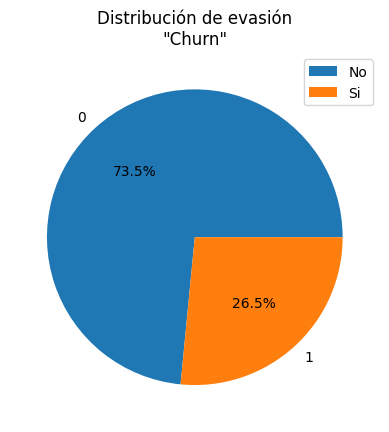

In [285]:
fig, ax = plt.subplots()
ax.pie(datos["churn"].value_counts(), labels=datos["churn"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de evasión\n"Churn"')
ax.legend(["No", "Si"])
plt.show()

In [286]:
import seaborn as sns

In [287]:
datos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.1867
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.9967
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.4633
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.2667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.8383
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.8367
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.6767
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.2617


/tmp/ipython-input-3098090612.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


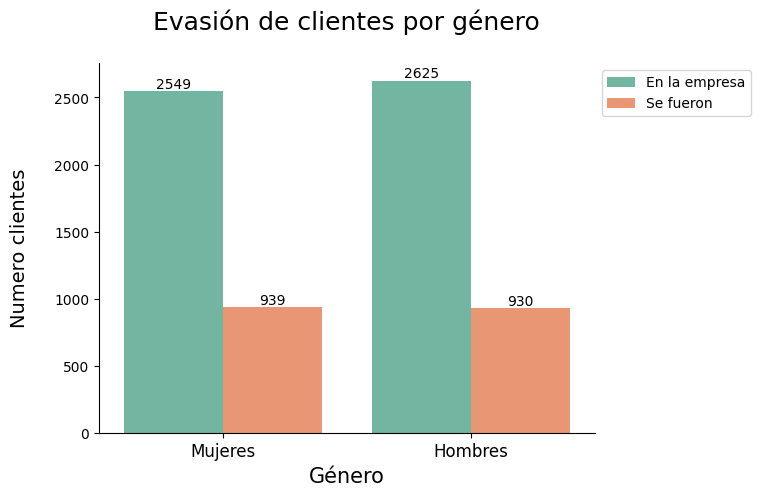

In [288]:
orden_original = ['Female', 'Male']
nombre_esp = ['Mujeres', 'Hombres']
sns.countplot(data=datos, x="gender", hue="churn", palette="Set2", order=orden_original)
plt.title('Evasión de clientes por género', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Género",fontsize=15)
ax.set_ylabel("Numero clientes",fontsize=14,labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

/tmp/ipython-input-3190777856.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


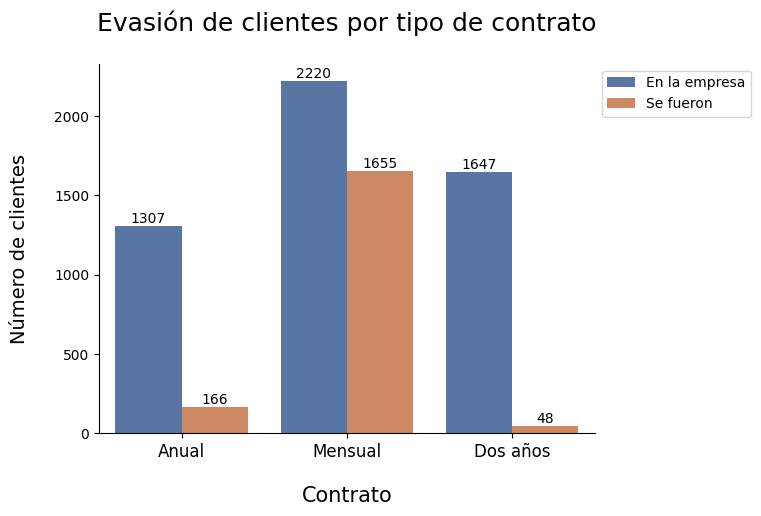

In [289]:
orden_original = ['One year', 'Month-to-month', 'Two year']

nombre_esp = ['Anual', 'Mensual', 'Dos años']

sns.countplot(data=datos, x="contract", hue="churn", palette="deep", order=orden_original)
plt.title('Evasión de clientes por tipo de contrato', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Contrato", fontsize=15, labelpad=18)
ax.set_ylabel("Número de clientes", fontsize=14, labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

/tmp/ipython-input-1878380811.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


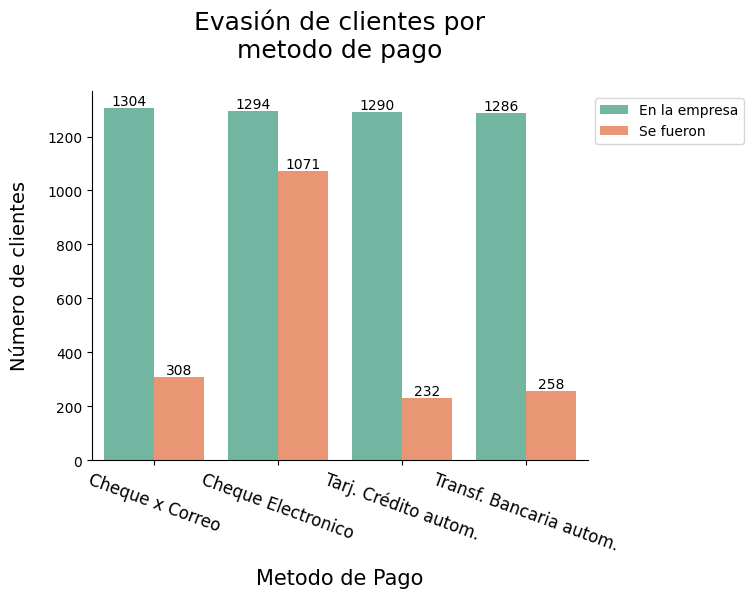

In [303]:
orden_original = ['Mailed check', 'Electronic check', 'Credit card (automatic)','Bank transfer (automatic)']

nombre_esp = ['Cheque x Correo', 'Cheque Electronico', 'Tarj. Crédito autom.','Transf. Bancaria autom.']

sns.countplot(data=datos, x="paymentmethod", hue="churn", palette= "Set2", order=orden_original)
plt.title('Evasión de clientes por\nmetodo de pago', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15,rotation=-20)
ax.set_xlabel("Metodo de Pago", fontsize=15, labelpad=10)
ax.set_ylabel("Número de clientes", fontsize=14, labelpad=13)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

In [307]:
columnas

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'chargesmonthly', 'chargestotal'],
      dtype='object')

In [325]:
datos["partner"].unique()

array([1, 0])

/tmp/ipython-input-2994951723.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


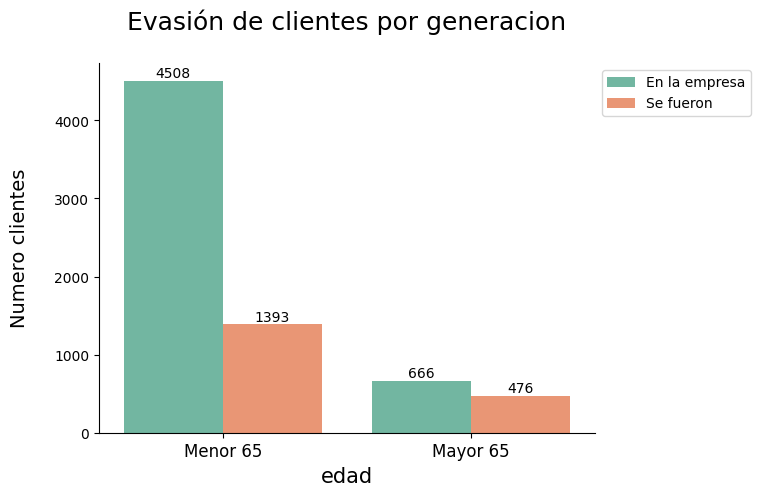

In [312]:
orden_original = [0, 1]
nombre_esp = ['Menor 65', 'Mayor 65']
sns.countplot(data=datos, x="seniorcitizen", hue="churn", palette="Set2", order=orden_original)
plt.title('Evasión de clientes por generacion', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Edad",fontsize=15)
ax.set_ylabel("Numero clientes",fontsize=14,labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

/tmp/ipython-input-2734218957.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


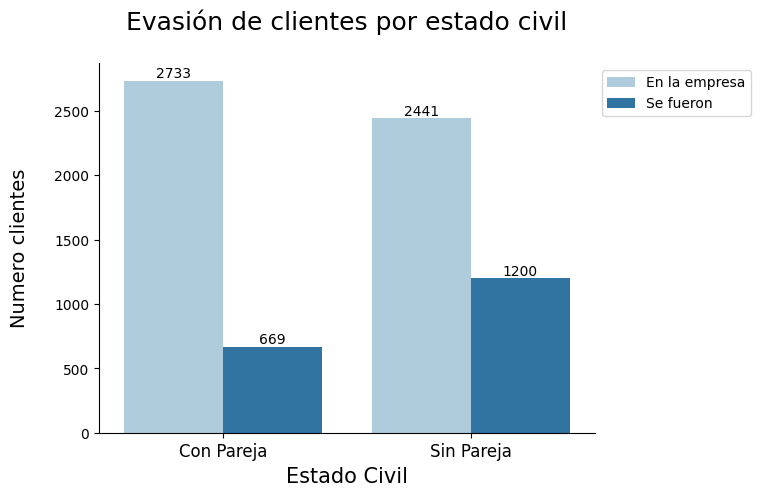

In [335]:
orden_original = [1, 0]
nombre_esp = ['Con Pareja', 'Sin Pareja']
sns.countplot(data=datos, x="partner", hue="churn", palette="Paired", order=orden_original)
plt.title('Evasión de clientes por estado civil', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Estado Civil",fontsize=15)
ax.set_ylabel("Numero clientes",fontsize=14,labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

In [336]:
datos["dependents"].unique()

array([1, 0])

/tmp/ipython-input-116767366.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nombre_esp, fontsize=12)


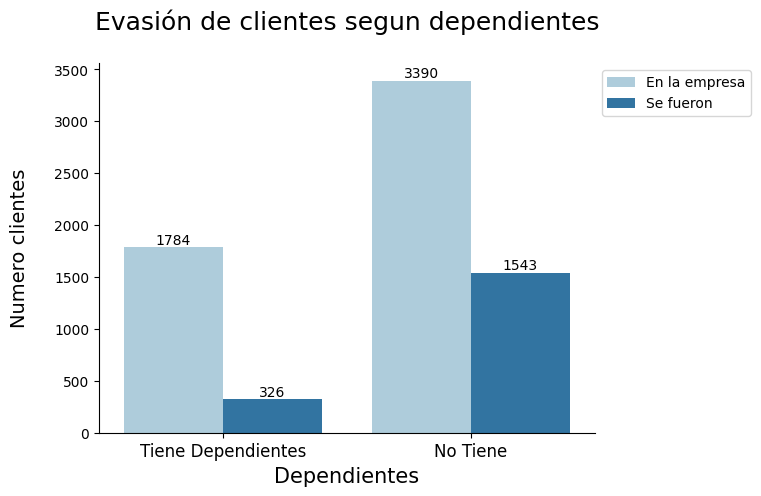

In [337]:
orden_original = [1, 0]
nombre_esp = ['Tiene Dependientes', 'No Tiene']
sns.countplot(data=datos, x="dependents", hue="churn", palette="Paired", order=orden_original)
plt.title('Evasión de clientes segun dependientes', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Dependientes",fontsize=15)
ax.set_ylabel("Numero clientes",fontsize=14,labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

In [ ]:
orden_original = [1, 0]
nombre_esp = ['Tiene Dependientes', 'No Tiene']
sns.countplot(data=datos, x="dependents", hue="churn", palette="Paired", order=orden_original)
plt.title('Evasión de clientes segun dependientes', loc="center", fontsize=18, pad=24)

sns.despine()

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["En la empresa", "Se fueron"], loc='upper left', bbox_to_anchor=(1,1))

ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Dependientes",fontsize=15)
ax.set_ylabel("Numero clientes",fontsize=14,labelpad=18)
ax.set_xticklabels(nombre_esp, fontsize=12)

plt.show()

## Segun servicios contratados

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.1867
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.9967
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.4633
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.2667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.8383
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.8367
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.6767
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.2617
